In [624]:
##grid
import numpy as np
import matplotlib.pyplot as plt

In [625]:
def depo_func(J):
    ##takes an array of terrain heights and returns the deposition rate
    J=np.array(J)
    x1=[]
    X0=[]
    for i in range(len(J)):
        for j in range(len(J[0])):
            x=[]
            if i==0:
                x.append(0)
                if j==0:
                    x.append(0)
                    x.append(J[1,0])
                    x.append(J[0,1])
                elif j==len(J)-1:
                    x.append(0)
                    x.append(J[0,j-1])
                    x.append(J[1,j])
                else:
                    x.append(J[0,j-1])
                    x.append(J[0,j+1])
                    x.append(J[1,j])
            elif i==len(J)-1:
                x.append(0)
                if j==0:
                    x.append(0)
                    x.append(J[i-1,0])
                    x.append(J[i,1])
                elif j==len(J)-1:
                    x.append(0)
                    x.append(J[i,j-1])
                    x.append(J[i-1,j])
                else:
                    x.append(J[i,j-1])
                    x.append(J[i,j+1])
                    x.append(J[i-1,j])
            elif j==0:
                x.append(0)
                x.append(J[i-1,0])
                x.append(J[i+1,0])
                x.append(J[i,1])
            elif j==len(J)-1:
                x.append(0)
                x.append(J[i-1,j])
                x.append(J[i+1,j])
                x.append(J[i,j-1])
            else:
                x.append(J[i,j+1])
                x.append(J[i+1,j])
                x.append(J[i,j-1])
                x.append(J[i-1,j])
            X=np.mean(x)
            X= X-J[i,j]
            X0.append(X)
        x1.append(X0)
        X0=[]
    return(x1)

In [626]:
def erosion_func(J,erosion_rate):
    ##takes an array of terrain heights and returns the eroded landscape
    x1=depo_func(J)
    x1=np.array(x1)
    J=np.array(J)
    
    o=[]
    O=[]
    
    for i in range(len(J)):
        for j in range(len(J[0])):
            o.append(J[i,j]+x1[i,j]*erosion_rate)
        O.append(o)
        o=[]
    return(O)

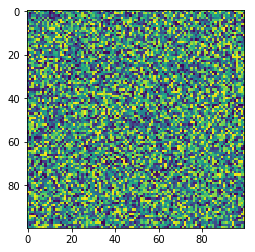

In [627]:
J=np.random.randint (0,100,(100,100))
J=np.array(J)
#J[50,50]=1000
plt.imshow(J)
plt.show()

In [628]:
print(J)

[[83 72 37 ... 85 64 70]
 [46  1 23 ... 87 91 14]
 [25 10 50 ... 52  2 91]
 ...
 [29 19 23 ... 30 20 17]
 [36  6 62 ... 10 76 56]
 [42 54 39 ... 39 78 39]]


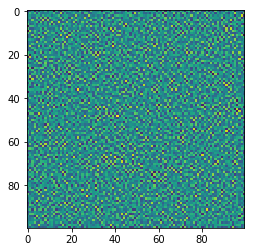

In [629]:
x1=depo_func(J)
plt.imshow(x1)
plt.show()

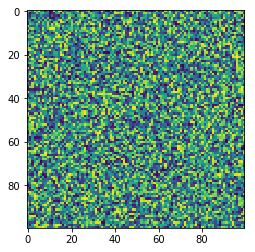

In [630]:
O=erosion_func(J,0.1)
plt.imshow(O)
plt.show()

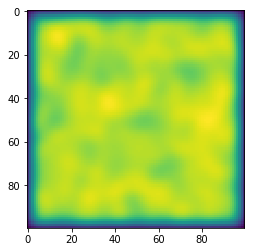

In [638]:
for i in range(100):
    O=erosion_func(J,0.1)
    J=O
    #plt.imshow(J)
    #plt.show()
plt.imshow(J)
plt.show()

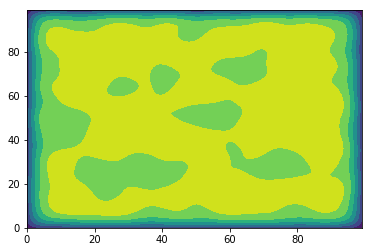

In [639]:
plt.contourf(J)
plt.show()

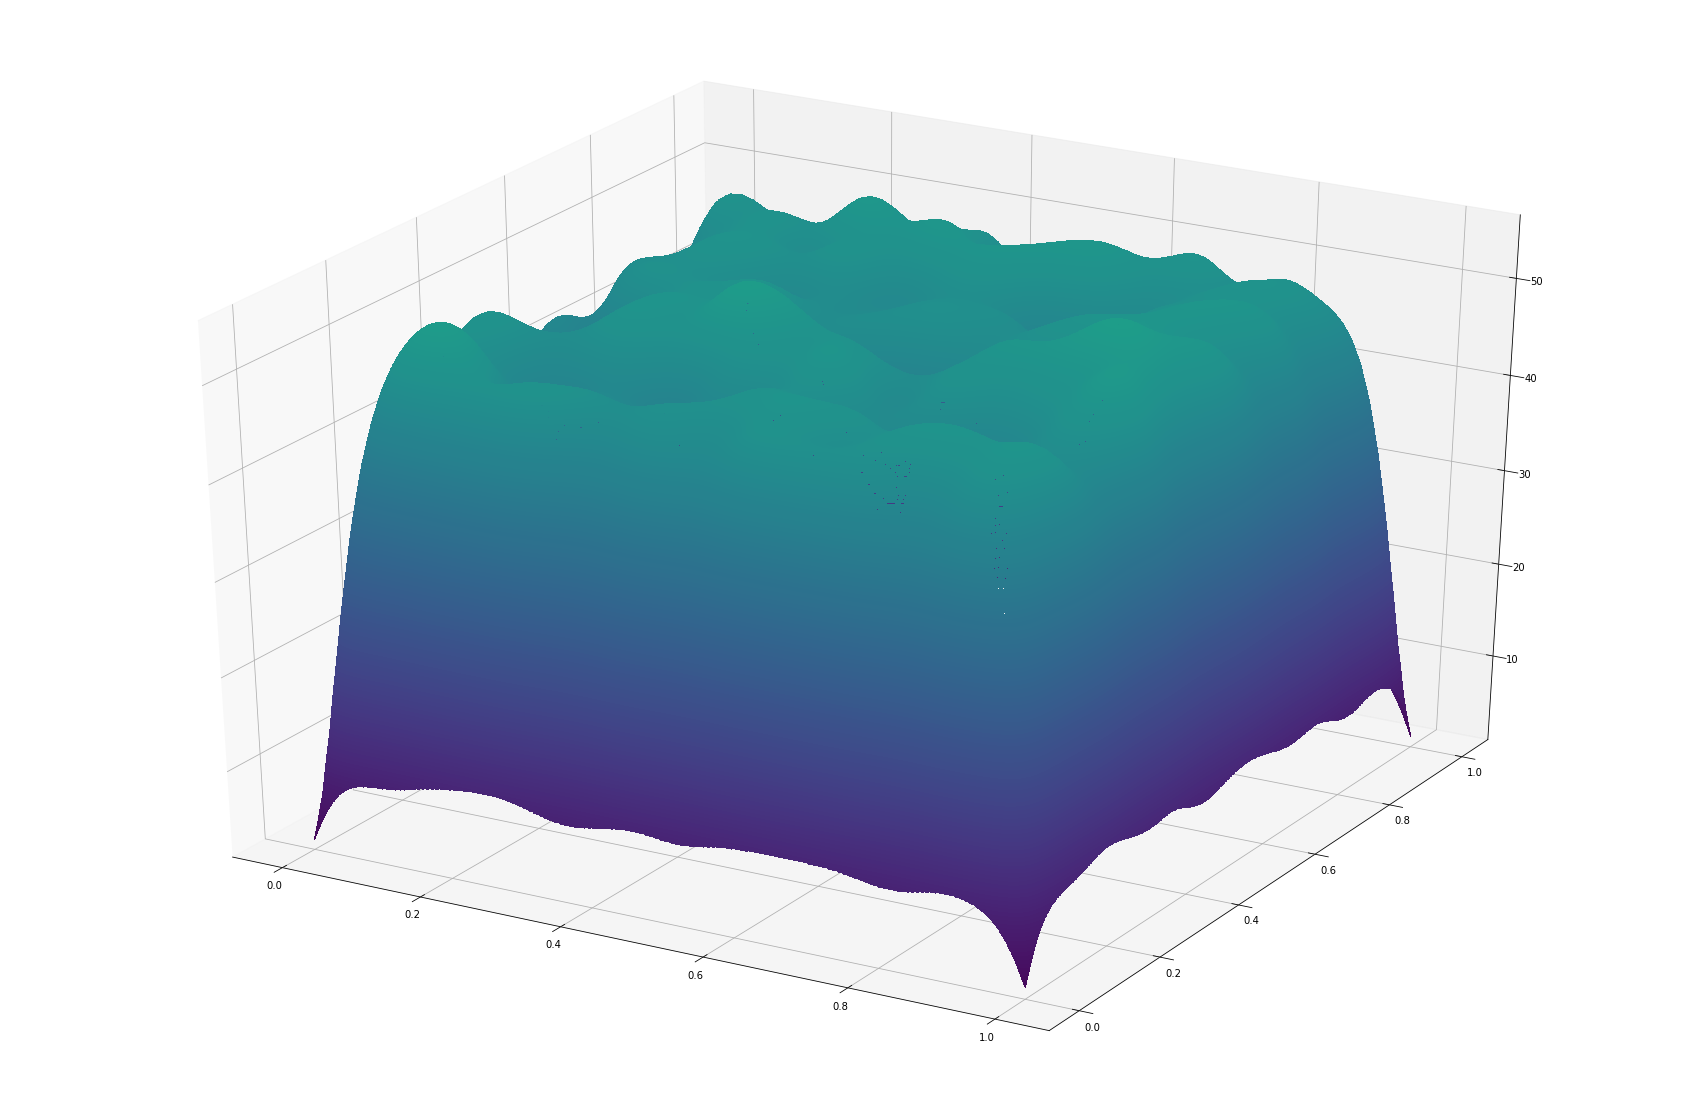

In [640]:
from mpl_toolkits.mplot3d import Axes3D

xx,yy=np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
fig = plt.figure(figsize=(30, 20))
ax = plt.axes(projection = '3d')
ax.contourf(xx,yy,J,levels=np.linspace(0,100,1000))
plt.show()

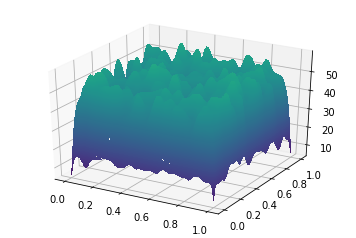

In [634]:
from mpl_toolkits.mplot3d import Axes3D

xx,yy=np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.contourf(xx,yy,J,levels=np.linspace(0,100,1000))
plt.show()

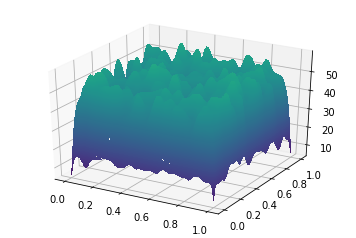

In [635]:
from mpl_toolkits.mplot3d import Axes3D

xx,yy=np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.contourf(xx,yy,J,levels=np.linspace(0,100,1000))
plt.show()

In [ ]:
##start a river at point 50,50

import numpy as np
###create grid system for yes/no gas content
#100*100?
X1=np.zeros((100,100))

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X1)
plt.show()

In [ ]:
coordinate_storage=[50,50]

In [ ]:
removal=0#ticker as to whether we are on the bottom edge
##x is coordinate storage 0, y is coordinate storage 1

##choose the lowest number nearby
lowest=[]

#add 100*X1 to make sure it doesn't refill places already full

row_1=J[coordinate_storage[1]-1]
row_2=J[coordinate_storage[1]]
try:
    row_3=J[coordinate_storage[1]+1]
except:
    print('nothing lower')
    removal=1
row1_1=X1[coordinate_storage[1]-1]
row1_2=X1[coordinate_storage[1]]
try:
    row1_3=X1[coordinate_storage[1]+1]
except:
    print('nothing lower')
    

lowest.append(100*row_1[coordinate_storage[0]]+row1_1[coordinate_storage[0]])
lowest.append(100*row_2[coordinate_storage[0]+1]+row1_2[coordinate_storage[0]+1])
lowest.append(100*row_2[coordinate_storage[0]-1]+row1_2[coordinate_storage[0]-1])
if removal==0:
    lowest.append(100*row_3[coordinate_storage[0]]+row1_3[coordinate_storage[0]])
print(lowest)
print(min(lowest))

if lowest[0]==min(lowest):
    coordinate_storage=[coordinate_storage[0],coordinate_storage[1]-1]
    print('up')
elif lowest[1]==min(lowest):
    coordinate_storage=[coordinate_storage[0]+1,coordinate_storage[1]]
    print('right')
elif lowest[2]==min(lowest):
    coordinate_storage=[coordinate_storage[0]-1,coordinate_storage[1]]
    print('left')
if removal==0:
    if lowest[3]==min(lowest):
        coordinate_storage=[coordinate_storage[0],coordinate_storage[1]+1]
        print('down')
print(coordinate_storage)
print(removal)


In [ ]:
def whichdirectionislowest(J,coordinate_storage):
    ###takes in location in array, and calculates coordinates of lowest neighbour
    ###returns new coordinates
    J=np.array(J)
    currentheight=J[coordinate_storage[0],coordinate_storage[1]]
    if coordinate_storage[0]==0 or coordinate_storage[1]==0 or coordinate_storage[0]==len(J)-1 or coordinate_storage[1]==len(J)-1:
        c=0
    else:
        
        removal=0#ticker as to whether we are on the bottom edge
        ##x is coordinate storage 0, y is coordinate storage 1
        
        ##choose the lowest number nearby
        lowest=[]
        
        #add 100*X1 to make sure it doesn't refill places already full
        
        row_1=J[coordinate_storage[0]-1]
        row_2=J[coordinate_storage[0]]
        row_3=J[coordinate_storage[0]+1]
        
        lowest.append(row_1[coordinate_storage[1]])
        lowest.append(row_2[coordinate_storage[1]+1])
        lowest.append(row_2[coordinate_storage[1]-1])
        lowest.append(row_3[coordinate_storage[1]])
        
        if min(lowest)>currentheight:
            c=0
        elif lowest[0]==min(lowest):
            coordinate_storage=[coordinate_storage[0]-1,coordinate_storage[1]]
        elif lowest[1]==min(lowest):
            coordinate_storage=[coordinate_storage[0],coordinate_storage[1]+1]
        elif lowest[2]==min(lowest):
            coordinate_storage=[coordinate_storage[0],coordinate_storage[1]-1]
        elif lowest[3]==min(lowest):
            coordinate_storage=[coordinate_storage[0]+1,coordinate_storage[1]]
        lowest.append(currentheight)
        currentheight=min(lowest)
            
    return(coordinate_storage)


In [ ]:
def rivertracer(J,coordinate_storage,addition=0,steepness=True):
    #traces the line of a river from coordinate in 2D array. Addition is for accumulation (later in river path is stronger)
    accumulator=0
    size=len(J)
    X1=np.zeros((size,size))
    X1=np.array(X1)
    while X1[coordinate_storage[0],coordinate_storage[1]]==0:
        accumulator+=addition
        #currentheight=J[coordinate_storage[0],coordinate_storage[1]]
        X1[coordinate_storage[0],coordinate_storage[1]]=(1+accumulator)
        coordinate_storage=whichdirectionislowest(J,coordinate_storage)
        
        #newheight=J[coordinate_storage[0],coordinate_storage[1]]
        
        #if steepness:
        #    multiplier=currentheight-newheight
        #    X1[coordinate_storage[0],coordinate_storage[1]]=(1+accumulator)*multiplier
        #else:
        #   X1[coordinate_storage[0],coordinate_storage[1]]=(1+accumulator)
    ##stops erosion at end of river path
    X1[coordinate_storage[0],coordinate_storage[1]]=0
    return(X1)

In [620]:
def rivertracer1(J,coordinate_storage,addition=0,steepness=True):
    #traces the line of a river from coordinate in 2D array. Addition is for accumulation (later in river path is stronger)
    J=np.array(J)
    accumulator=0
    size=len(J)
    currentheight=J[coordinate_storage[0],coordinate_storage[1]]
    
    X1=np.zeros((size,size))
    X1=np.array(X1)
    
    multiplier=1
    while multiplier>0 and currentheight>0:
        
        accumulator+=addition
        
        currentheight=J[coordinate_storage[0],coordinate_storage[1]]

        coordinate_storage2=whichdirectionislowest(J,coordinate_storage)
        
        newheight=J[coordinate_storage2[0],coordinate_storage2[1]]
        
        if steepness:
            multiplier=currentheight-newheight
            X1[coordinate_storage[0],coordinate_storage[1]]=(1+accumulator)*(multiplier+1)
        else:
            X1[coordinate_storage[0],coordinate_storage[1]]=(1+accumulator)
        coordinate_storage=coordinate_storage2
    ##stops erosion at end of river path
    X1[coordinate_storage[0],coordinate_storage[1]]=0
    return(X1)

In [ ]:
def rivererosion(J,rivererosionrate,addition1=0):
    ###returns a completed, RIVER eroded version of J with erosion rate. addition parameter means more erosion
    ##'further down'; might not be needed, set to 0
    J=np.array(J)
    X=np.zeros((100,100))

    for i in range(len(J)):
        for j in range(len(J[i])):
            XD=rivertracer1(J,[i,j],addition=addition1)
            X+=XD
    
    D=J-X*rivererosionrate
    return(D)

In [ ]:
plt.imshow(rivertracer1(J,[73,50],addition=0))
plt.show()
plt.imshow(J)
plt.show()

In [641]:
X=np.zeros((100,100))
print(coordinate_storage)

for i in range(len(J)):
    for j in range(len(J[i])):
        XD=rivertracer(J,[i,j],addition=0)
        X+=XD


[50, 51]
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4

33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
3

61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
6

90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
9

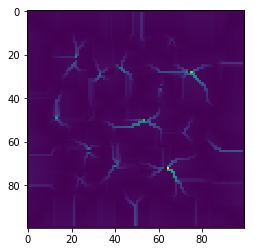

In [642]:
plt.imshow(X)
plt.show()



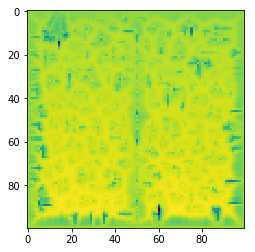

[[ 1.85341158  3.25640403  4.1489212  ...  3.97189938  3.25219175
   1.90636901]
 [ 3.25524602  2.25524602  3.1489212  ... -0.54829025  2.25219175
   3.39692425]
 [ 4.19282959 -0.43043055  5.81608972 ...  5.492089    3.45549933
   4.45549933]
 ...
 [12.54800189  2.44516215 19.65084163 ... 19.20173602  2.37074838
  12.2862422 ]
 [10.12410708  9.12410708 12.38662648 ... 11.93207807  8.8544311
   9.8544311 ]
 [ 5.85490512 10.35886384 13.38662648 ... 12.93207807 10.03686996
   5.67725094]]


In [553]:
I=rivererosion(J,1)
plt.imshow(I)
plt.show()
print(I)

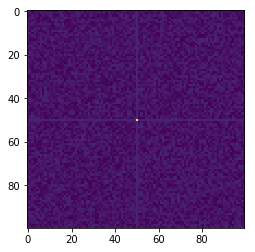

In [660]:
J=np.random.randint (0,10000,(100,100))
J=np.array(J)

#for i in range(len(J)):
#    for j in range(len(J[0])):
#        ###add some gradient
#        J[i,j]=J[i,j]+i/2

J[:,50]=10000
J[50,:]=10000
J[50,50]=100000
plt.imshow(J)
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


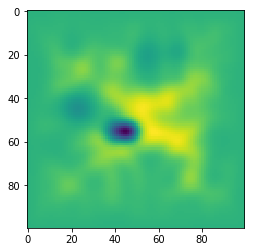

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [674]:
####INCORPORATION. smoothing followed by rivers
for i in range(40):
    J=erosion_func(J,0.1)
    print(i)


plt.imshow(J)
plt.show()

for i in range(100):
    print(i)
    J=erosion_func(J,0.2)
    J=rivererosion(J,0.02)


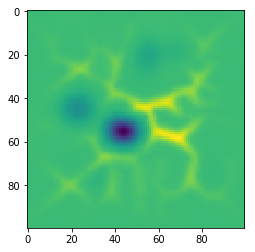

[ 4.23802743e-01  4.53649239e-01  2.08310857e-01  3.02704979e-02
 -3.89260107e-02 -4.09958422e-02 -4.89256578e-02 -5.10270574e-02
 -4.18107807e-02 -3.05529973e-02  2.36014785e-02  3.97771937e-01
  1.16115939e+00  2.10388018e+00  2.70826352e+00  2.84373668e+00
  2.88703573e+00  3.04872306e+00  3.13325871e+00  3.12339995e+00
  3.04420036e+00  2.91885622e+00  2.75554860e+00  2.55211426e+00
  2.33084348e+00  2.27290793e+00  2.34835828e+00  2.17798781e+00
  1.54139443e+00  8.30946419e-01  4.17133473e-01  4.05205229e-01
  3.12750191e-01  2.05917832e-01  2.98366573e-01  4.31893688e-01
  4.39495706e-01  3.43267078e-01  2.67780723e-01  2.85775946e-01
  4.30548621e-01  5.48317888e-01  6.27358695e-01  8.31262278e-01
  6.71964891e-01  2.35958748e-01  6.23855616e-02  9.45027203e-03
  8.23878646e-03  9.16552408e-02  3.30758701e-01  9.94041776e-01
  1.97330544e+00  2.64112061e+00  2.97572706e+00  3.13358462e+00
  3.14789059e+00  3.03893731e+00  2.83237408e+00  2.50255351e+00
  2.06223343e+00  1.69054

In [675]:

plt.imshow(J)
plt.show()
print(J[0])

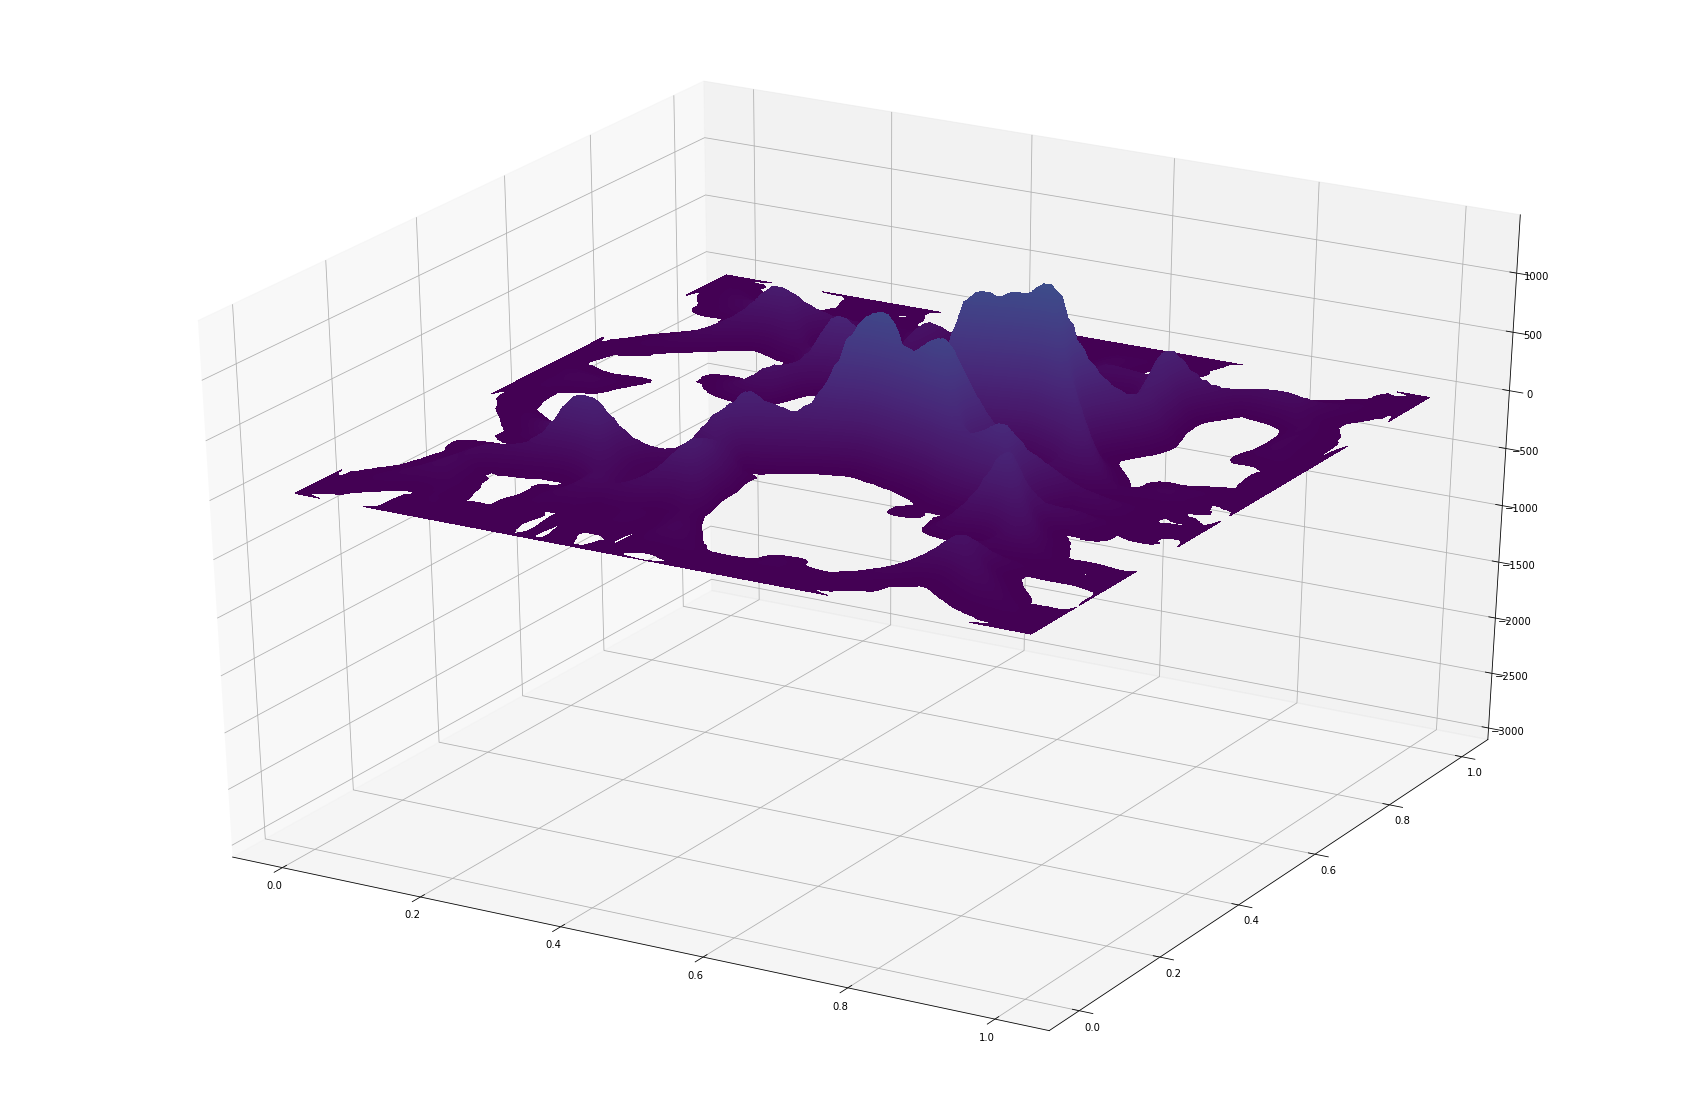

In [676]:
from mpl_toolkits.mplot3d import Axes3D

xx,yy=np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
fig = plt.figure(figsize=(30, 20))
ax = plt.axes(projection = '3d')
ax.contourf(xx,yy,J,levels=np.linspace(0,6000,1000))
plt.show()

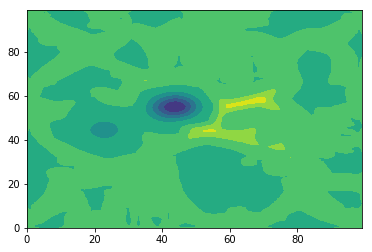

In [677]:
plt.contourf(J)
plt.show()